# Создание таблицы c временным рядом

> Для корректной работы ссылок оглавления лучше смотреть проект здесь \
> https://nbviewer.org/github/experiment0/sf_data_science/blob/main/project_11/create_table.ipynb

**Оглавление**<a id='toc0_'></a>    
- [Загрузка и описание исходных таблиц](#toc1_)    
  - [Основная таблица с данными](#toc1_1_)    
  - [Таблица с кодами временных периодов](#toc1_2_)    
  - [Таблица с кодами категорий бизнеса](#toc1_3_)    
  - [Таблица с типами данных](#toc1_4_)    
  - [Таблица с кодами ошибок](#toc1_5_)    
- [Формирование итоговой таблицы с временным рядом](#toc2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Таблица с исходными данными взята с сайта переписи населения США: https://www.census.gov/econ_datasets/ \
Из файла с названием: `Monthly Retail Trade and Food Services MRTS-mf.zip`

In [1]:
import pandas as pd

from warnings import simplefilter
simplefilter('ignore')

## <a id='toc1_'></a>[Загрузка и описание исходных таблиц](#toc0_)

Исходный файл `MRTS-mf.csv` из архива содержит в себе несколько таблиц. \
Выделим их в отдельные файлы.

### <a id='toc1_1_'></a>[Основная таблица с данными](#toc0_)

In [2]:
data = pd.read_csv('./data/DATA.csv')

data.head()

,per_idx,cat_idx,dt_idx,et_idx,geo_idx,is_adj,val
0,1,1,1,0,1,0,146376.0
1,2,1,1,0,1,0,147079.0
2,3,1,1,0,1,0,159336.0
3,4,1,1,0,1,0,163669.0
4,5,1,1,0,1,0,170068.0


В столбцах данной таблицы содержаться коды следующих значений:

- `per_idx` - Код временного из таблицы `TIME_PERIODS.csv `
- `cat_idx` - Код категории бизнеса из таблицы  `CATEGORIES.csv`
- `dt_idx` - Код типа данных из таблицы `DATA_TYPES.csv`
- `et_idx` - Код с типом ошибки из таблицы `ERROR_TYPES.csv`
- `geo_idx` - Код региона. Всегда имеет значение 1 и обозначает США.
- `is_adj` - Определяет, скорректировано ли значение с учетом сезонных колебаний или нет. \
Значение 1 указывает на то, что оно скорректировано, 0 означает, что не скорректировано.
- `val` - данные, тип которых указан в столбце `dt_idx`.

Теперь загрузим таблицы со значениями кодов.

### <a id='toc1_2_'></a>[Таблица с кодами временных периодов](#toc0_)

In [3]:
time_periods_data = pd.read_csv('./data/TIME_PERIODS.csv')

time_periods_data

,per_idx,per_name
0,1,Jan-1992
1,2,Feb-1992
2,3,Mar-1992
3,4,Apr-1992
4,5,May-1992
...,...,...
403,404,Aug-2025
404,405,Sep-2025
405,406,Oct-2025
406,407,Nov-2025


**Описание столбцов:**

- `per_idx` - Код временного периода
- `per_name` - Название временного периода (месяц-год)

### <a id='toc1_3_'></a>[Таблица с кодами категорий бизнеса](#toc0_)

In [4]:
categories_data = pd.read_csv('./data/CATEGORIES.csv')

categories_data.head()

,cat_idx,cat_code,cat_desc,cat_indent
0,1,44X72,44X72: Retail Trade and Food Services,0
1,2,44Y72,"44Y72: Retail Trade and Food Services, ex Auto",0
2,3,44Z72,"44Z72: Retail Trade and Food Services, ex Gas",0
3,4,44W72,"44W72: Retail Trade and Food Services, ex Auto...",0
4,5,44000,44000: Retail Trade,0


**Описание столбцов:**

- `cat_idx` - Код категории бизнеса
- `cat_code` - Сокращенный код категории
- `cat_desc` - Описание категории
- `cat_indent` - Уровень иерархии категории

### <a id='toc1_4_'></a>[Таблица с типами данных](#toc0_)

In [5]:
data_types_data = pd.read_csv('./data/DATA_TYPES.csv')

data_types_data

,dt_idx,dt_code,dt_desc,dt_unit
0,1,SM,Sales - Monthly,MLN$
1,2,IM,Inventories - Monthly,MLN$
2,3,IR,Inventories/Sales Ratio,RATIO
3,4,MPCIM,Inventories - Monthly Percent Change,PCT
4,5,MPCSM,Sales - Monthly Percent Change,PCT


**Описание столбцов:**

- `dt_idx` - Код типа данных
- `dt_code` - Аббревиатура описания типа данных
- `dt_desc` - Описания типа данных
- `dt_unit` - Единица измерения данных
    - `MLN$` - в миллионах долларов США
    - `RATIO` - соотношение
    - `PCT` - процент

### <a id='toc1_5_'></a>[Таблица с кодами ошибок](#toc0_)

In [6]:
error_types_data = pd.read_csv('./data/ERROR_TYPES.csv')

error_types_data

,et_idx,err_code,err_desc,err_unit
0,1,E_SM,CV of Sales - Monthly,PCT
1,2,E_IM,CV of Inventories - Monthly,PCT
2,3,E_IR,SE of Inventories/Sales Ratio,RATIO
3,4,E_MPCIM,SE of Inventories - Monthly Percent Change,PCT
4,5,E_MPCSM,SE of Sales - Monthly Percent Change,PCT


**Описание столбцов:**

- `et_idx` - Код ошибки
- `err_code` - Аббревиатура описания ошибки
- `err_desc` - Описание ошибки
- `err_unit` - Код единицы измерения для этого типа ошибки
    - `PCT` - процент
    - `RATIO` - соотношение

## <a id='toc2_'></a>[Формирование итоговой таблицы с временным рядом](#toc0_)

Будем рассматривать только категорию с `cat_idx = 1` \
Она содержит данные о розничной торговле и общественном питании (Retail Trade and Food Services)

Также будем рассматривать только даные с категорией `dt_idx = 1`. \
Она содержит данные о продажах за месяц (Sales - Monthly) в миллионах долларов США (MLN$).

Будем рассматривать только значения не скорректированные с учетом сезонных колебаний (с `is_adj = 0`).

Отфильтруем наши данные.

In [7]:
mask = (data['cat_idx'] == 1) & (data['dt_idx'] == 1) & (data['is_adj'] == 0)

data = data[mask]

data.head()

,per_idx,cat_idx,dt_idx,et_idx,geo_idx,is_adj,val
0,1,1,1,0,1,0,146376.0
1,2,1,1,0,1,0,147079.0
2,3,1,1,0,1,0,159336.0
3,4,1,1,0,1,0,163669.0
4,5,1,1,0,1,0,170068.0


Столбец `geo_idx` содержит только одно уникальное значение, это код США

In [8]:
data['geo_idx'].unique()

array([1], dtype=int64)

Мы можем удалить поле `geo_idx` и поля, по которым делали фильтрацию, так как они не имеют уникальных значений.

In [9]:
columns_to_drop = ['cat_idx', 'dt_idx', 'is_adj', 'geo_idx']
data.drop(columns=columns_to_drop, inplace=True)

data.head()

,per_idx,et_idx,val
0,1,0,146376.0
1,2,0,147079.0
2,3,0,159336.0
3,4,0,163669.0
4,5,0,170068.0


Посмотрим на уникальные значения в поле `et_idx` (код с типом ошибки).

In [10]:
data['et_idx'].unique()

array([0], dtype=int64)

Поле имеет единственное значение 0, поэтому удалим его.

In [11]:
data.drop(columns=['et_idx'], inplace=True)

Посмотрим на размерность данных.

In [12]:
data.shape

(397, 2)

Теперь добавим в таблицу `data` столбец `per_name` с названием временного периода из таблицы `time_periods_data`.

In [13]:
data = data.merge(
    time_periods_data,
    on='per_idx',
    how='left',
)

data

,per_idx,val,per_name
0,1,146376.0,Jan-1992
1,2,147079.0,Feb-1992
2,3,159336.0,Mar-1992
3,4,163669.0,Apr-1992
4,5,170068.0,May-1992
...,...,...,...
392,393,683558,Sep-2024
393,394,730720,Oct-2024
394,395,736461,Nov-2024
395,396,801294,Dec-2024


Переведем столбец `per_name` в формат `datetime`.

In [14]:
data['per_name'] = pd.to_datetime(data['per_name'], format='%b-%Y')

data

,per_idx,val,per_name
0,1,146376.0,1992-01-01
1,2,147079.0,1992-02-01
2,3,159336.0,1992-03-01
3,4,163669.0,1992-04-01
4,5,170068.0,1992-05-01
...,...,...,...
392,393,683558,2024-09-01
393,394,730720,2024-10-01
394,395,736461,2024-11-01
395,396,801294,2024-12-01


Удалим столбец `per_idx`, а столбец `per_name` сделаем индексом.

In [15]:
data.drop(columns=['per_idx'], inplace=True)
data.set_index('per_name', inplace=True)
data

,val
per_name,
1992-01-01,146376.0
1992-02-01,147079.0
1992-03-01,159336.0
1992-04-01,163669.0
1992-05-01,170068.0
...,...
2024-09-01,683558
2024-10-01,730720
2024-11-01,736461


Посмотрим на тип столбца `val`.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1992-01-01 to 2025-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   val     397 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


Преобразуем его в тип `float`.

In [17]:
data['val'] = data['val'].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1992-01-01 to 2025-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   val     397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


Проверим, есть ли пропуски в данных.

In [18]:
data.asfreq(freq='MS', fill_value=None).isna().sum()

val    0
dtype: int64

Пропущенных дат нет.

Посмотрим, как данные выглядят на графике.

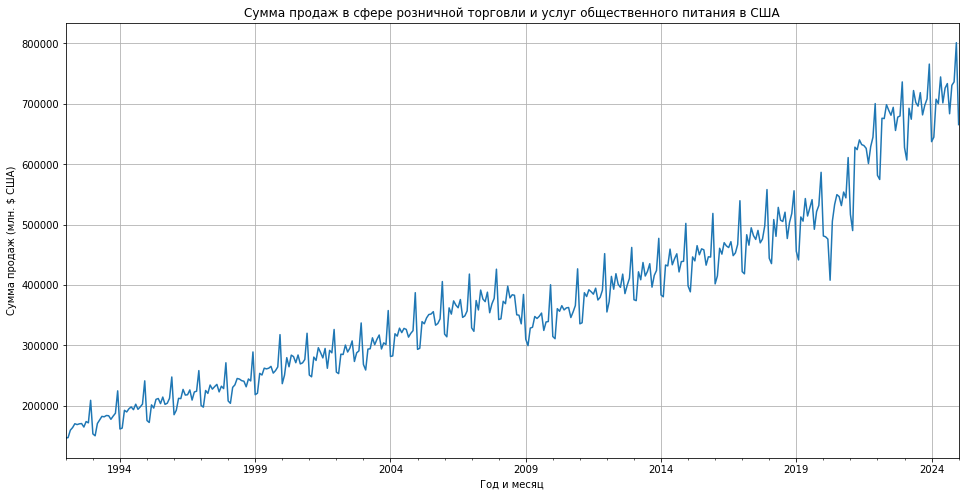

In [19]:
data.plot(
    figsize=(16,8),
    title='Сумма продаж в сфере розничной торговли и услуг общественного питания в США',
    xlabel='Год и месяц',
    ylabel='Сумма продаж (млн. $ США)',
    grid=True,
    legend=False,
);

Для упрощения дальнейших расчетов и разделения выборки оставим только данные за полные года.\
Уберем данные за январь 2025 г.

In [20]:
data = data[data.index.year < 2025]

Сохраним полученную таблицу.

In [21]:
data.to_csv('./data/retail_trade_and_food_services.csv')